Calculate the information entropy of a random variable that showed the following behavior:
A, B, B, A, C, B, A, C, A, B, C, A, A, A, A, A, A, A, C, A

In [35]:
from matplotlib import pyplot as plt
from math import log2
import numpy as np
import seaborn as sns
import csv

# Expected self-information

In [39]:
observation = ["A", "B", "B", "A", "C", "B", "A", "C", "A", "B", "C", "A", "A", "A", "A", "A", "A", "A", "C", "A"]

In [40]:
# Calculate probability of each occurence
probabilities = dict((x, observation.count(x)/len(observation)) for x in set(observation))
probabilities

{'A': 0.6, 'B': 0.2, 'C': 0.2}

In [47]:
# Create self-information function
# Accepts a list of probabilities of each event
def H(x):
    """
    x: probability space
    """
    self_information = sum([-1*p*log2(p) for p in x])
    return self_information

In [51]:
prob_space = [v for v in probabilities.values()]
H(prob_space)

1.3709505944546687

In [67]:
# 3 equally likely events
a = H([1/3, 1/3, 1/3])
print("Expected amount of self-information:\t", a)
print(2**a)

Expected amount of self-information:	 1.584962500721156
3.0


In [64]:
a = H([1/2, 1/4, 1/4])
print("Expected amount of self-information:\t", a)
print(2**a)

Expected amount of self-information:	 1.5
2.8284271247461903


In [68]:
a = H([1/4, 1/4, 1/4, 1/4])
print("Expected amount of self-information:\t", a)
print(2**a)

Expected amount of self-information:	 2.0
4.0


In [70]:
# Hartley's I(A)
# I(A) = K logb(|A|)
a = [1, 2, 3]
card_a = len(list(set(a)))
log2(card_a)

1.584962500721156

## Plotting I(X)

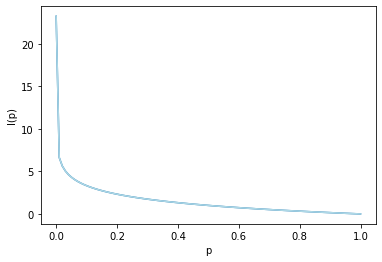

In [24]:
info = lambda t: -1*log2(t)

x = np.linspace(0.0000001, 0.9999999, 100)
y = np.array([info(xi) for xi in x])

ax = sns.lineplot(x = x, y = y)
ax.set(xlabel="p", ylabel="I(p)")
plt.plot(x, y, color="lightblue")

## Entropy of a dataset

In [35]:
rows = 0
with open('./data/world-series.csv', mode='r', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',')
    # store column names
    headers = next(reader, None)
#     print(headers)
    
    # store data
    column = dict()
    for h in headers:
        column[h] = []
    
    for row in reader:
        for h, v in zip(headers, row):
            column[h].append(v)
        rows+=1
f.close()
print("Num. rows read:", rows)
print("First 3 entries: \ufeffYear:", column['\ufeffYear'][:3])
print("First 3 entries: X (American):", column['X (American)'][:3])
print("First 3 entries: Y (National):", column['Y (National)'][:3])

Num. rows read: 20
First 3 entries: ﻿Year: ['2001', '2002', '2003']
First 3 entries: X (American): ['Yankees', 'Angels', 'Yankees']
First 3 entries: Y (National): ['Diamondbacks', 'Giants', 'Marlins']


### Amount of uncertainty in American MLB league from 2001 - 2020

In [72]:
counts_X = [column["X (American)"].count(v) for v in list(set(column["X (American)"]))]
# counts = [column["Y (National)"].count(v) for v in list(set(column["Y (National)"]))]

print("Num. American League World Series winners:", len(list(set(column["X (American)"]))))
print("Tally of wins:")
print({v:column["X (American)"].count(v) for v in list(set(column["X (American)"]))}, "\n")

y_entropy = -1*sum([p*log2(p) for p in [count/sum(counts_X) for count in counts_X]])
print(y_entropy)

Num. American League World Series winners: 10
Tally of wins:
{'Indians': 1, 'Red Sox': 4, 'White Sox': 1, 'Angels': 1, 'Yankees': 3, 'Rangers': 2, 'Tigers': 2, 'Astros': 2, 'Rays': 2, 'Royals': 2} 

3.1841837197791882


In [53]:
# Effective number of teams
pow(2, y_entropy)

9.08939153177016

### Amount of uncertainty in National MLB league from 2001 - 2020

In [73]:
counts_Y = [column["Y (National)"].count(v) for v in list(set(column["Y (National)"]))]
# counts = [column["Y (National)"].count(v) for v in list(set(column["Y (National)"]))]

print("Num. National League World Series winners:", len(list(set(column["Y (National)"]))))
print("Tally of wins:")
print({v:column["Y (National)"].count(v) for v in list(set(column["Y (National)"]))}, "\n")

y_entropy = -1*sum([p*log2(p) for p in [count/sum(counts_Y) for count in counts_Y]])
print(y_entropy)

Num. National League World Series winners: 11
Tally of wins:
{'Phillies': 2, 'Nationals': 1, 'Rockies': 1, 'Diamondbacks': 1, 'Cubs': 1, 'Cardinals': 4, 'Mets': 1, 'Giants': 4, 'Dodgers': 3, 'Astros': 1, 'Marlins': 1} 

3.184183719779189


### Information in a deck of cards

In [26]:
# Shuffle a deck of cards
# Pick one card - a heart
# How much information was gained about the suits?
-1*log2(1/4)

2.0

In [27]:
# Shuffle a deck of cards
# Pick one card - a King
# How much information was gained about the value of cards?
-1*log2(4/52)

3.700439718141092

In [32]:
# Shuffle a deck of cards
# Pick one card - king of spades
# How much information do you gain from this event?
-1*log2(1/4*4/52)

5.700439718141092

In [30]:
# Or calculated additively
-1*log2(1/4) + -1*log2(4/52)

5.700439718141093

## Differential Entropy